In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('diabetic_data.csv')

In [332]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [308]:
data.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [333]:
data.replace('?',np.NaN,inplace=True)

In [334]:
data.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [335]:
data.nunique()

encounter_id                101766
patient_nbr                  71518
race                             5
gender                           3
age                             10
weight                           9
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      17
medical_specialty               72
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         716
diag_2                         748
diag_3                         789
number_diagnoses                16
max_glu_serum                    3
A1Cresult                        3
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [336]:
cols_to_drop= ['weight','payer_code','medical_specialty','encounter_id','patient_nbr','examide','citoglipton']

In [337]:
data = data.drop(cols_to_drop, axis=1)
data.isnull().sum()

race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone 

In [338]:
data.shape

(101766, 43)

In [339]:
data['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [5]:
data['diag_1'].value_counts()

diag_1
428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
373       1
314       1
684       1
217       1
V51       1
Name: count, Length: 717, dtype: int64

In [343]:
data=data[data['gender']!='Unknown/Invalid']

In [358]:
data.dropna(how='any',axis=0,inplace=True)

In [359]:
data.shape

(99492, 30)

In [345]:
data['readmitted'] = data['readmitted'].replace('>30',0)
data['readmitted'] = data['readmitted'].replace('<30',1)
data['readmitted'] = data['readmitted'].replace('NO',0)

<Axes: xlabel='readmitted'>

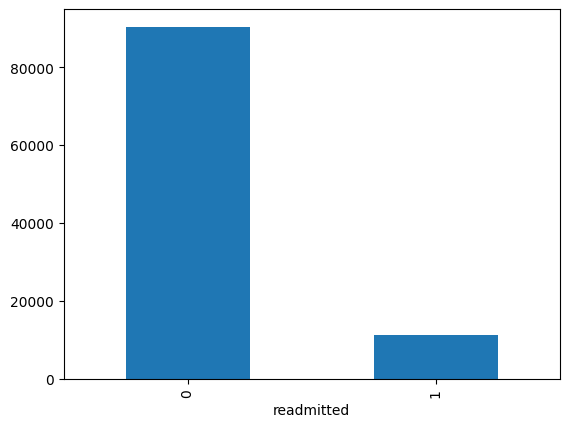

In [175]:
data['readmitted'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'number of medications used vS. readmission')

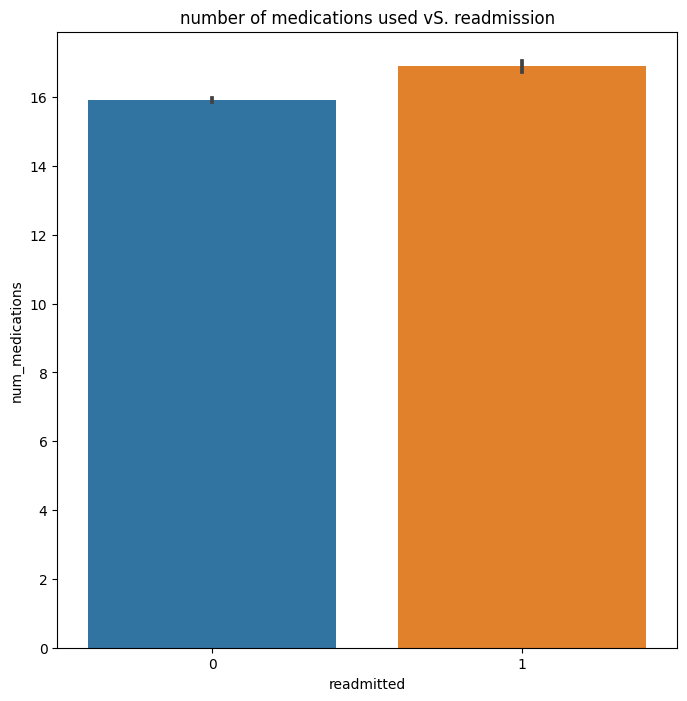

In [21]:
fig = plt.figure(figsize=(8,8))
sb.barplot(x = data['readmitted'], y = data['num_medications']).set_title("number of medications used vS. readmission")

Text(0.5, 1.0, 'Age of patient VS.Readmission')

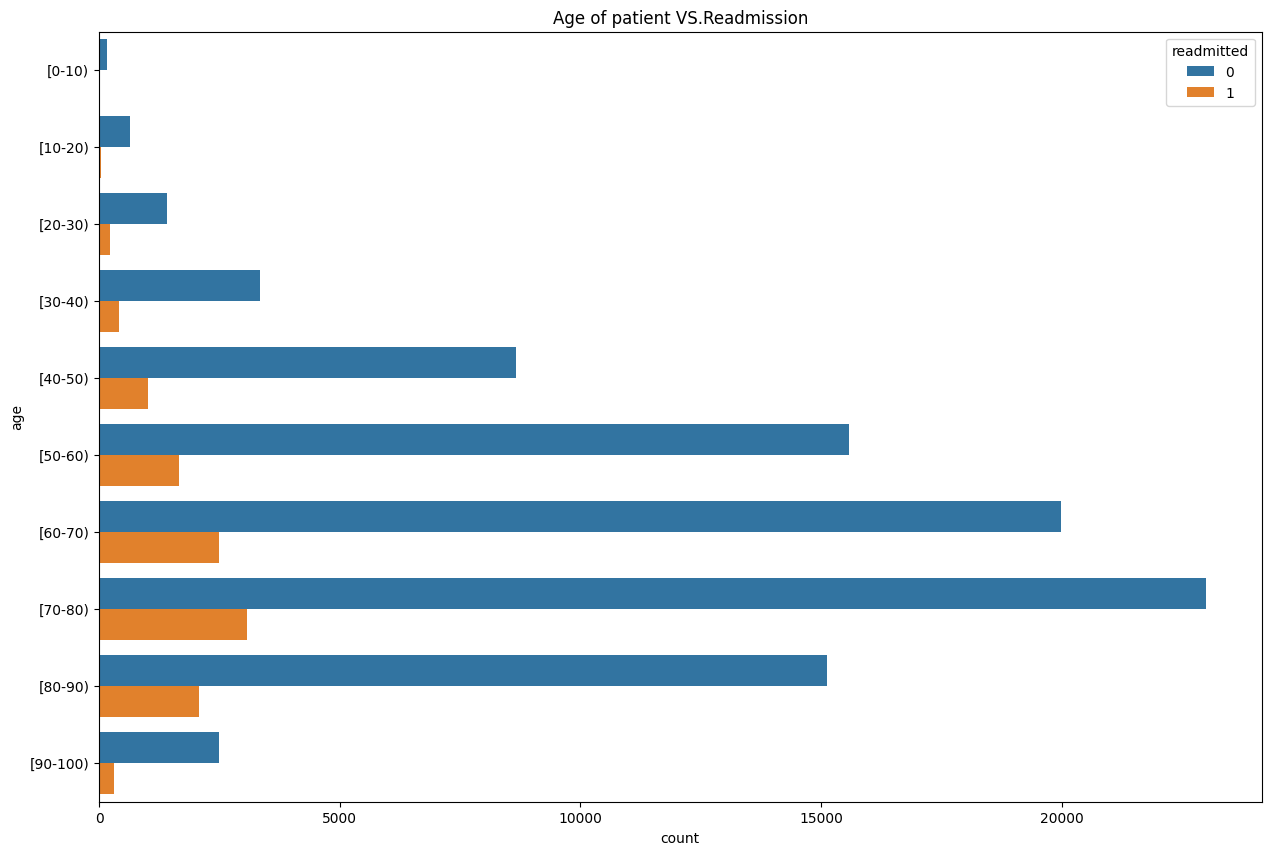

In [22]:
fig = plt.figure(figsize=(15,10))
sb.countplot(y= data['age'], hue = data['readmitted']).set_title('Age of patient VS.Readmission')

Text(0.5, 1.0, 'Gender of patient VS.Readmission')

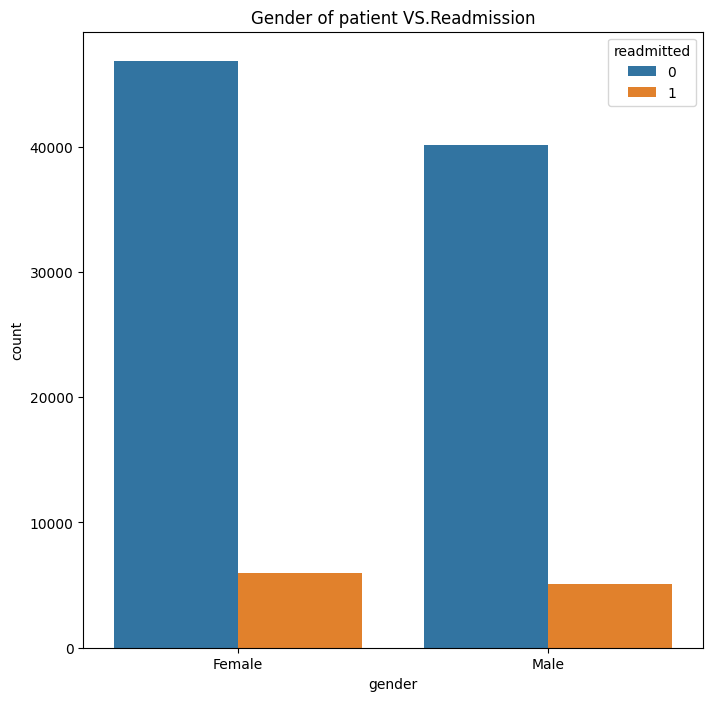

In [ ]:
fig = plt.figure(figsize=(8,8))
sb.countplot(x= data['gender'], hue = data['readmitted']).set_title("Gender of patient VS.Readmission")

Text(0.5, 1.0, 'Change of Medication VS. readmisssion')

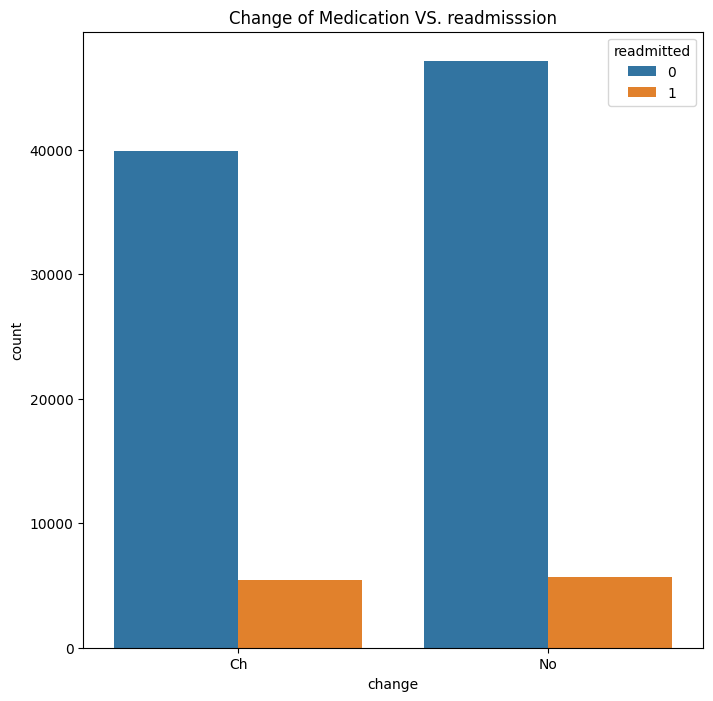

In [ ]:
fig = plt.figure(figsize=(8,8))
sb.countplot(x=data['change'], hue = data['readmitted']).set_title('Change of Medication VS. readmisssion')

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

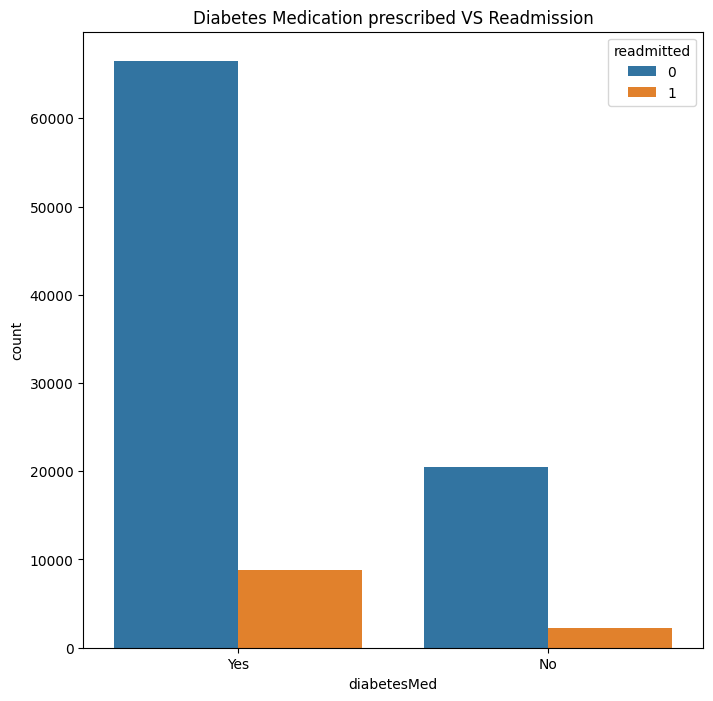

In [ ]:
fig = plt.figure(figsize=(8,8))
sb.countplot(x=data['diabetesMed'], hue = data['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

Text(0.5, 1.0, 'Glucose serum test result VS.Readmission')

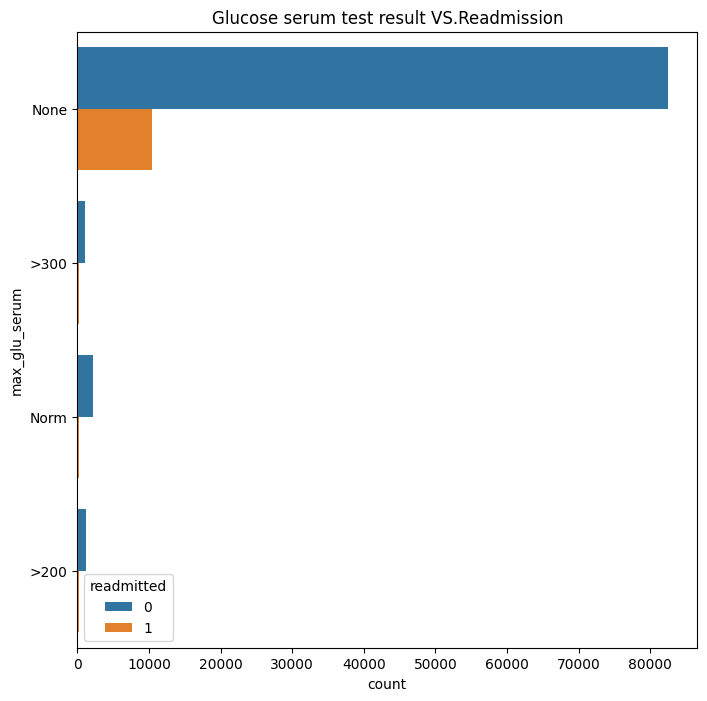

In [ ]:
fig = plt.figure(figsize=(8,8))
sb.countplot(y = data['max_glu_serum'], hue = data['readmitted']).set_title("Glucose serum test result VS.Readmission")

C:\Users\RAMYASRI\AppData\Local\Temp\ipykernel_18352\1525196617.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sb.kdeplot(data.loc[(data['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
C:\Users\RAMYASRI\AppData\Local\Temp\ipykernel_18352\1525196617.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sb.kdeplot(data.loc[(data['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')


Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

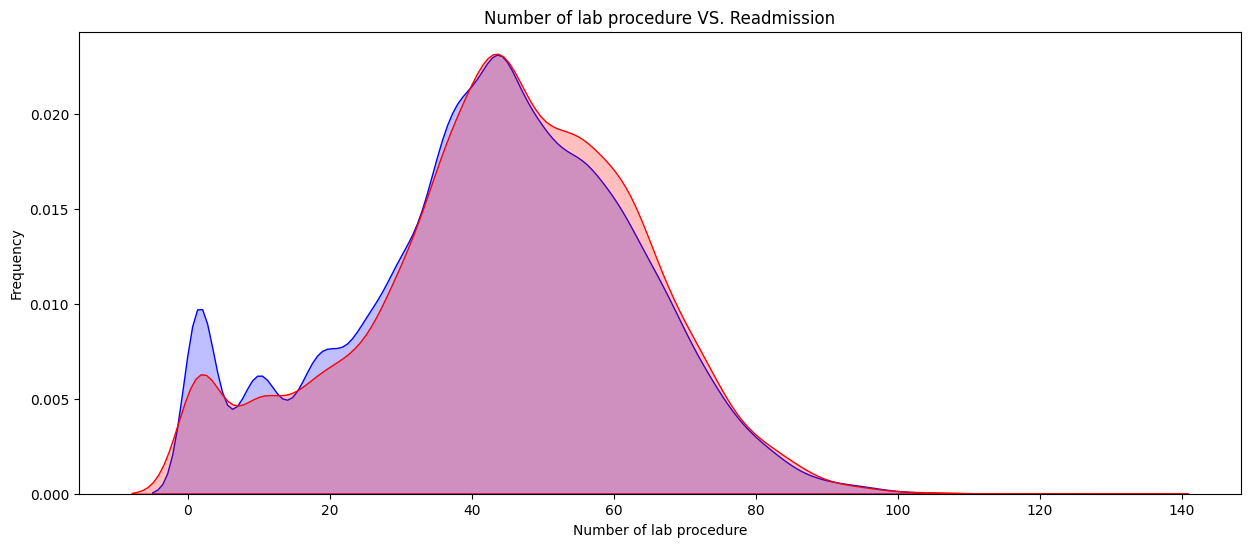

In [23]:
fig = plt.figure(figsize=(15,6),)
ax=sb.kdeplot(data.loc[(data['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sb.kdeplot(data.loc[(data['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure' , ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

<ipython-input-105-aec194644292>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sb.kdeplot(data.loc[(data['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
<ipython-input-105-aec194644292>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sb.kdeplot(data.loc[(data['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True,label='Readmitted')


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

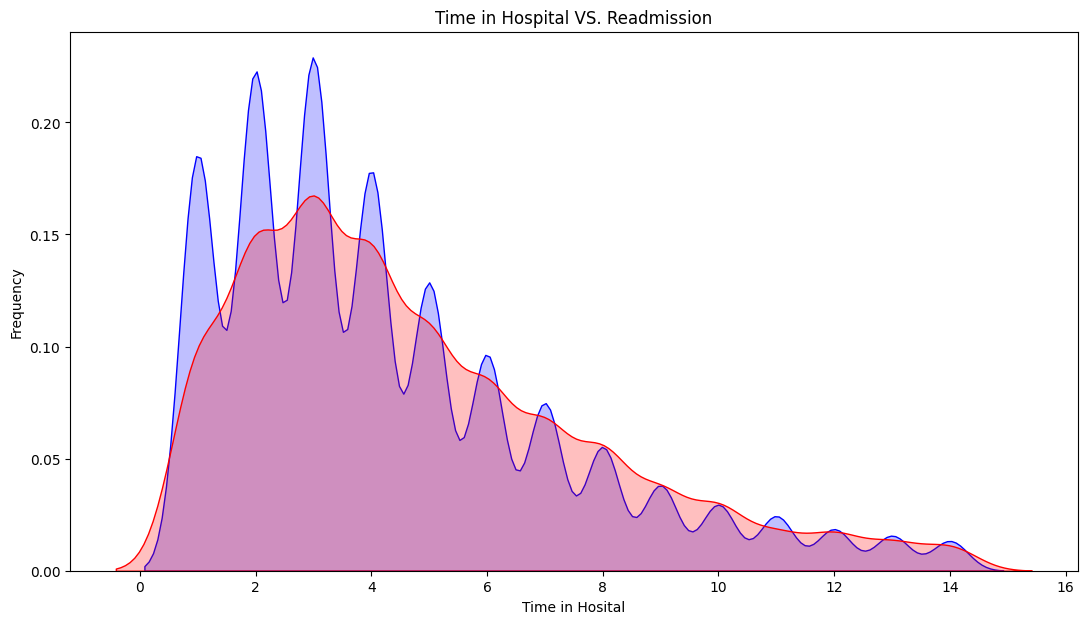

In [ ]:
fig = plt.figure(figsize=(13,7),)
ax=sb.kdeplot(data.loc[(data['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sb.kdeplot(data.loc[(data['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True,label='Readmitted')
ax.set(xlabel='Time in Hosital',ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')


In [176]:
data.describe(include='all')

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,99492,101763,101763,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763,101763,101763,101763,101763,101763,101763,101763,101763,101763.000000
unique,5,2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,4,4,2,2,2,2,2,2,NaN
top,Caucasian,Female,[70-80),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NaN
freq,76099,54708,26066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101724,47380,101057,101750,101762,101761,101762,54754,78361,NaN
mean,NaN,NaN,NaN,2.024017,3.715515,5.754459,4.396018,43.095909,1.339691,16.021835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111602
std,NaN,NaN,NaN,1.445414,5.279919,4.064110,2.985092,19.674220,1.705792,8.127589,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.314878
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [346]:
data = data.replace({'admission_type_id':{2:1,7:1, 6:5,8:5}, 'discharge_disposition_id': {6:1,8:1,9:1, 13:1, 3:2,4:2,5:2, 14:2,22:2,23:2,24:2, 12:10, 15:10, 16:10, 17:10,25:18,26:18}, 'admission_source_id':{2:1, 3:1,5:4,6:4, 10:4,22:4,25:4,15:9,17:9,20:9,21:9,13:11,14:11}})

In [347]:
drugs = ['metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']
drugs_to_drop =["nateglinide", "chlorpropamide", "acetohexamide", "tolbutamide",
"acarbose", "miglitol", "troglitazone", "tolazamide", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]


In [348]:
for col in drugs:
   data[col] = data[col].replace('No', 0)
   data[col] = data[col].replace('Steady', 1)
   data[col] = data[col].replace('Up', 1)
   data[col] = data[col].replace('Down', 1)


In [349]:
data.drop(drugs_to_drop,axis=1,inplace=True,)

In [350]:
data['A1Cresult'] = data['A1Cresult'].replace('>7', 1)
data['A1Cresult'] = data['A1Cresult'].replace('>8', 1)
data['A1Cresult'] = data['A1Cresult'].replace('Norm', 0)
data['A1Cresult'] = data['A1Cresult'].replace('None', -99)
data['max_glu_serum'] = data['max_glu_serum'].replace('>200', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('>300', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('Norm', 0)
data['max_glu_serum'] = data['max_glu_serum'].replace('None', -99)

In [351]:
data['age'].value_counts()

age
[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

In [352]:
def calculate_midpoint(age_range):
    start, end = map(int, age_range.strip('[]()').split('-'))
    return (start + end) // 2
data['age']=data['age'].apply(calculate_midpoint)
data['age'].value_counts()

age
75    26066
65    22482
55    17256
85    17197
45     9685
35     3775
95     2793
25     1657
15      691
5       161
Name: count, dtype: int64

In [353]:
def conv_diag(icd9):
    try:
        n = float(icd9)
        if ( n >= 390 and n <= 459 ) or (n==785):
          return "circulatory"
        elif (n >= 520 and n <= 579 ) or (n==787):
          return "digestive"
        elif ( n >= 580 and n<=629) or (n==788):
          return "genitourinary"
        elif np.trunc(n) ==250:
          return "diabetes"
        elif (n >= 800 and n <= 999 ) :
          return "injury"
        elif (n >= 710 and n<=739):
          return "musculoskeletal"
        elif (n>140 and n<=239):
          return "neoplasms"
        elif (n>=460 and n<=519) or (n==786):
          return "respiratory"
        else:
          return "other"
    except:
          return "other"

In [357]:
data['diag_1'] = data['diag_1'].apply(conv_diag)
data['diag_2'] = data['diag_2'].apply(conv_diag)
data['diag_3'] = data['diag_3'].apply(conv_diag)
data.isnull().sum()

race                        2271
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                         0
diag_2                         0
diag_3                         0
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
glimepiride                    0
glipizide                      0
glyburide                      0
pioglitazone                   0
rosiglitazone                  0
insulin                        0
change                         0
diabetesMed                    0
readmitted                     0
dtype: int

In [374]:
X = data.drop(['readmitted'], axis= 1)
y =  data['readmitted']
X.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
glimepiride                 0
glipizide                   0
glyburide                   0
pioglitazone                0
rosiglitazone               0
insulin                     0
change                      0
diabetesMed                 0
dtype: int64

In [375]:
data['max_glu_serum'].fillna(-99, inplace=True)
data['A1Cresult'].fillna(-99, inplace=True)

In [376]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder


In [377]:
ct = ColumnTransformer([('oe', OrdinalEncoder(), ['diag_1', 'diag_2', 'diag_3', 'change','race', 'gender', 'diabetesMed'])]
                       , remainder ='passthrough')

In [378]:
x = ct.fit_transform(X)

In [379]:
import joblib
joblib.dump (ct, 'feature_values')

['feature_values']

In [380]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,
stratify=y,
test_size=0.3, random_state=20)


In [381]:
X_train.shape, X_test.shape, y_train. shape, y_test.shape

((69644, 29), (29848, 29), (69644,), (29848,))

In [382]:
from imblearn.over_sampling import SMOTE

In [383]:
sm = SMOTE(random_state = 20)
X1_res, y1_res = sm.fit_resample(X_train,y_train)

In [384]:
X1_res = np.array(X1_res)

In [385]:
y1_res = np.array(y1_res)

In [386]:
X_train, X_val, y_train, y_val = train_test_split(X1_res,y1_res, test_size=0.3, random_state=20)

In [387]:
X_train.shape, X_val. shape, y_train. shape, y_val.shape

((86556, 29), (37096, 29), (86556,), (37096,))

In [57]:
pip install xgboost

   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.7 MB 656.4 kB/s eta 0:02:32
   ---------------------------------------- 0.2/99.7 MB 1.5 MB/s eta 0:01:06
   ---------------------------------------- 0.5/99.7 MB 2.7 MB/s eta 0:00:38
   ---------------------------------------- 0.5/99.7 MB 2.7 MB/s eta 0:00:38
   ---------------------------------------- 0.7/99.7 MB 2.9 MB/s eta 0:00:34
   ---------------------------------------- 0.9/99.7 MB 2.9 MB/s eta 0:00:34
    --------------------------------------- 1.4/99.7 MB 4.1 MB/s eta 0:00:24
    --------------------------------------- 1.9/99.7 MB 4.7 MB/s eta 0:00:21
    --------------------------------------- 2.0/99.7 MB 4.7 MB/s eta 0:00:21
    --------------------------------------- 2.2/99.7 MB 4.7 MB/s eta 0:00:21
    --------------------------------------- 2.2/99.7 MB 4.4 MB/s eta 0:00:23
    -------

In [388]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc

In [389]:
# Creating a dictionary of all models
model_dict = {}
model_dict['Logistic regression']= LogisticRegression(solver='liblinear', random_state=20)
model_dict['KNN Classifier'] = KNeighborsClassifier()
model_dict['Decision Tree Classifier'] = DecisionTreeClassifier (random_state=20)
model_dict['Random Forest Classifier'] = RandomForestClassifier (random_state=20)
model_dict['AdaBoost Classifier'] = AdaBoostClassifier (random_state=20)
model_dict[ 'Gradient Boosting Classifier'] = GradientBoostingClassifier(random_state=20)

In [390]:
#function to print accuracy of all models
def model_test(X_train, X_test, y_train, y_test, model, model_name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('================={}================='.format(model_name))
    print('Score is: {}'.format(accuracy))

    print()

In [230]:
for model_name, model in model_dict.items():
    model_test(X_train, X_val, y_train, y_val, model, model_name)

=================Logistic regression=================
Score is: 0.5989570988385874

=================KNN Classifier=================
Score is: 0.7959232045508414

=================Decision Tree Classifier=================
Score is: 0.8757736167074873

=================Random Forest Classifier=================
Score is: 0.9363198230228332

=================AdaBoost Classifier=================
Score is: 0.9084037818335046

=================Gradient Boosting Classifier=================
Score is: 0.9275499723473177



In [63]:
for model_name, model in model_dict.items():
    p = model.predict(X_test)
    print('Testing accuracy of ',model_name,'-' , accuracy_score (y_test,p))

Testing accuracy of  Logistic regression - 0.6519047463067903
Testing accuracy of  KNN Classifier - 0.5936650397982246
Testing accuracy of  Decision Tree Classifier - 0.7886927183988994
Testing accuracy of  Random Forest Classifier - 0.886861672508107
Testing accuracy of  AdaBoost Classifier - 0.8805725703429526
Testing accuracy of  Gradient Boosting Classifier - 0.8879753676831865


In [391]:
#Fitting data to Random Forest classifier
rfc = RandomForestClassifier (random_state=20)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_val)
print('Training Accuracy of Random Forest = ', accuracy_score (y_val, pred_rfc))

Training Accuracy of Random Forest =  0.9379447918913091


Feature: race, Score: 0.00000
Feature: gender, Score: 0.00000
Feature: age, Score: 0.00000
Feature: admission_type_id, Score: 0.07044
Feature: discharge_disposition_id, Score: 0.03279
Feature: admission_source_id, Score: 0.08760
Feature: time_in_hospital, Score: 0.05462
Feature: num_lab_procedures, Score: 0.02703
Feature: num_procedures, Score: 0.01380
Feature: num_medications, Score: 0.08305
Feature: number_outpatient, Score: 0.01332
Feature: number_emergency, Score: 0.04935
Feature: number_inpatient, Score: 0.05106
Feature: diag_1, Score: 0.03726
Feature: diag_2, Score: 0.04594
Feature: diag_3, Score: 0.01781
Feature: number_diagnoses, Score: 0.02645
Feature: max_glu_serum, Score: 0.13743
Feature: A1Cresult, Score: 0.03317
Feature: metformin, Score: 0.00336
Feature: repaglinide, Score: 0.00852
Feature: glimepiride, Score: 0.05687
Feature: glipizide, Score: 0.00235
Feature: glyburide, Score: 0.00653
Feature: pioglitazone, Score: 0.02951
Feature: rosiglitazone, Score: 0.01893
Feature: 

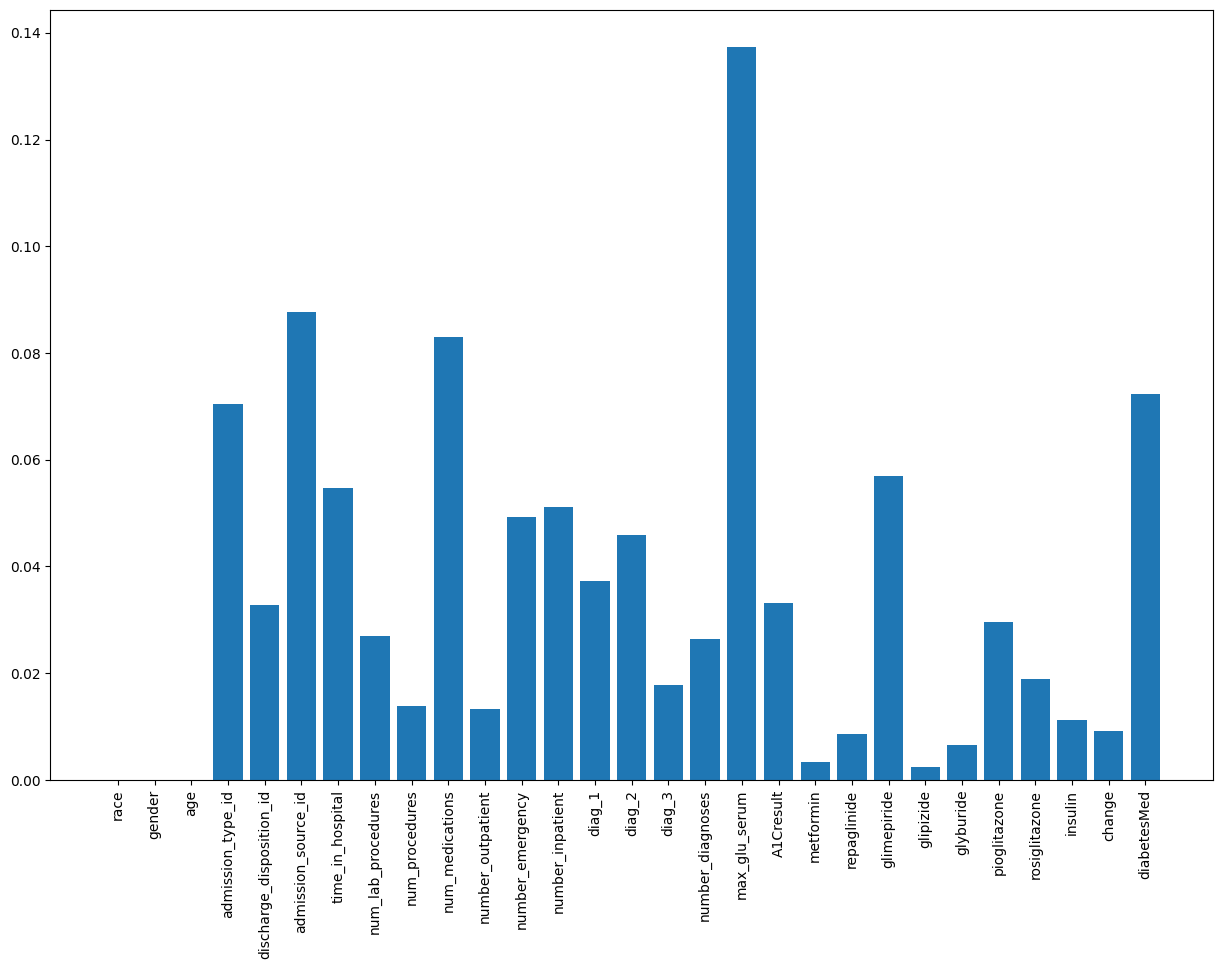

In [392]:
import matplotlib.pyplot as plt

importance = rfc.feature_importances_

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X.columns[i], v))

# Plot feature importance
plt.figure(figsize=(15, 10))
plt.bar(X.columns, importance)
plt.xticks(rotation=90)
plt.show()


In [393]:
important_features = [X.columns[i] for i, v in enumerate(importance) if v >= 0.032]
print(important_features)

['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_medications', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'max_glu_serum', 'A1Cresult', 'glimepiride', 'diabetesMed']


In [394]:
important_features

['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_medications',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'max_glu_serum',
 'A1Cresult',
 'glimepiride',
 'diabetesMed']

In [395]:
final_data = data[important_features+['readmitted']].copy()

In [396]:
final_data.shape

(99492, 14)

In [397]:
X1 = final_data.drop(['readmitted','admission_type_id','A1Cresult'],axis =1)
y1 = final_data['readmitted']

In [398]:
ct =ColumnTransformer ([('oe', OrdinalEncoder(), ['diag_1', 'diag_2', 'diabetesMed'])] ,remainder='passthrough')

In [399]:
X1 = ct.fit_transform(X1)

In [400]:
X1.shape,y1.shape

((99492, 11), (99492,))

In [401]:
X1

array([[  0.,   0.,   0., ...,   0., -99.,   0.],
       [  0.,   0.,   1., ...,   0., -99.,   0.],
       [  0.,   0.,   1., ...,   1., -99.,   0.],
       ...,
       [  0.,   0.,   1., ...,   0., -99.,   0.],
       [  0.,   0.,   1., ...,   1., -99.,   0.],
       [  0.,   0.,   0., ...,   0., -99.,   0.]])

In [402]:
import joblib
joblib.dump (ct, 'feature_values2')

['feature_values2']

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1,stratify=y1, test_size=0.3, random_state=20)

In [404]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((69644, 11), (29848, 11), (69644,), (29848,))

In [405]:
#Fitting data to Random Forest classifier
rfc1 = RandomForestClassifier (random_state=20)
rfc1.fit(X_train,y_train)
pred_rfc = rfc1.predict(X_test)
pred_rfc
print('Training Accuracy of Random Forest = ', accuracy_score (y_test, pred_rfc))

Training Accuracy of Random Forest =  0.871180648619673


In [406]:
from imblearn.over_sampling import SMOTE

In [407]:
sm = SMOTE(random_state=20)
X1_res,y1_res = sm.fit_resample(X_train,y_train)

In [408]:
X1_res = np.array(X1_res)

In [409]:
y1_res = np.array(y1_res)

In [414]:
X_train, X_val, y_train, y_val = train_test_split(X1_res,y1_res, test_size=0.3, random_state=20)

In [415]:
X_train.shape, X_val. shape, y_train. shape, y_val.shape

((86556, 11), (37096, 11), (86556,), (37096,))

In [416]:
#Fitting data to Random Forest classifier
rfc1 = RandomForestClassifier (random_state=20)
rfc1.fit(X_train,y_train)
pred_rfc = rfc1.predict(X_val)
pred_rfc
print('Training Accuracy of Random Forest = ', accuracy_score (y_val, pred_rfc))

Training Accuracy of Random Forest =  0.8313295233987492


In [418]:
for model_name, model in model_dict.items():
    model_test(X_train,X_val,y_train,y_val,model,model_name)

=================Logistic regression=================
Score is: 0.5832165193012724

=================KNN Classifier=================
Score is: 0.7298900150959672

=================Decision Tree Classifier=================
Score is: 0.819117964200992

=================Random Forest Classifier=================
Score is: 0.8313295233987492

=================AdaBoost Classifier=================
Score is: 0.7210480914384301

=================Gradient Boosting Classifier=================
Score is: 0.7567931852490835



In [419]:
for model_name, model in model_dict.items():
    model_test(X_train,X_val,y_train,y_val,model,model_name)

=================Logistic regression=================
Score is: 0.5832165193012724

=================KNN Classifier=================
Score is: 0.7298900150959672

=================Decision Tree Classifier=================
Score is: 0.819117964200992

=================Random Forest Classifier=================
Score is: 0.8313295233987492

=================AdaBoost Classifier=================
Score is: 0.7210480914384301

=================Gradient Boosting Classifier=================
Score is: 0.7567931852490835



Text(50.722222222222214, 0.5, 'Actual ')

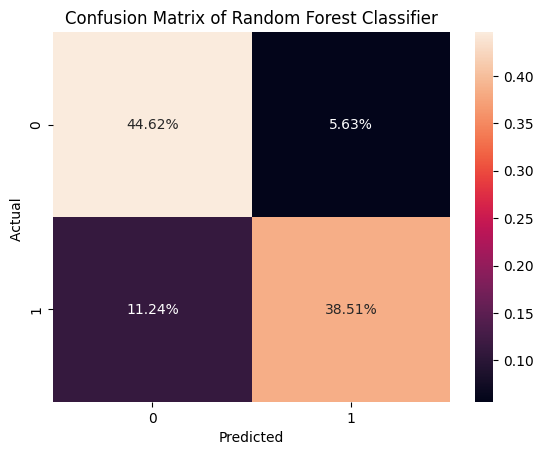

In [421]:
#Plotting confusion matrix
cf_matrix = confusion_matrix(y_val, pred_rfc)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual ')

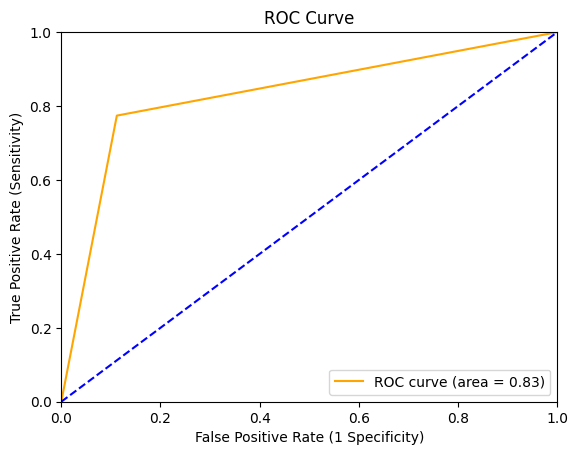

(array([0.        , 0.11201116, 1.        ]),
 array([0.        , 0.77409916, 1.        ]),
 array([inf,  1.,  0.]))

In [422]:
#Plotting ROC curve
fpr_rfc, tpr_rfc, thresholds_rfc=roc_curve (y_val, pred_rfc)
roc_auc_rfc=metrics.auc(fpr_rfc, tpr_rfc)
plt.plot(fpr_rfc, tpr_rfc, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], color='blue', linestyle= '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend (loc= "lower right")
plt.show()
roc_curve (y_val, pred_rfc)

In [423]:
print(classification_report (y_val, pred_rfc))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84     18641
           1       0.87      0.77      0.82     18455

    accuracy                           0.83     37096
   macro avg       0.84      0.83      0.83     37096
weighted avg       0.84      0.83      0.83     37096



In [425]:
from joblib import load,dump
dump(rfc1,'RFC.joblib')
dump()

['RFC.joblib']

In [ ]:
f=load('feature_values2')

In [ ]:
model = joblib.load("RFS1.joblib")

In [464]:
# Function to preprocess and make predictions
def make_prediction(data):
    # Handle data preprocessing
    data_df = pd.DataFrame([data])

    # Convert 'max_glu_serum' to numeric values
    data_df['max_glu_serum'] = data_df['max_glu_serum'].apply(lambda x: 1 if x == '>200' or x == '>300' else (0 if x == 'Norm' else -99))

    # Map 'glimepiride' and 'diabetesMed' to numeric values
    data_df['glimepiride'] = data_df['glimepiride'].apply(lambda x: 1 if x.lower() == 'yes' else 0)
    data_df['diabetesMed'] = data_df['diabetesMed'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

    # Create LabelEncoders for categorical features and transform the data
    for feature in ['discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2']:
        encoder = LabelEncoder()
        encoder.fit(data_df[feature])
        data_df[feature] = encoder.transform(data_df[feature])

    # Make predictions
    pred = model.predict(ct.fit_transform(data_df))

    if pred[0] == 1:
        return "This patient will be readmitted"
    else:
        return "This patient will not be readmitted"

# User input values
user_input = {
    'discharge_disposition_id': 10,  # Adjusted to a different value
    'admission_source_id': 20,       # Adjusted to a different value
    'time_in_hospital': 40,          # Adjusted to a different value
    'num_medications': 200,          # Adjusted to a different value
    'number_emergency': 20,         # Adjusted to a different value
    'number_inpatient': 40,         # Adjusted to a different value
    'diag_1': '40',               # Adjusted to a different diagnosis code
    'diag_2': '80',               # Adjusted to a different diagnosis code
    'max_glu_serum': 'None',       # Adjusted to a different value
    'glimepiride': 'No',           # Adjusted to 'No'
    'diabetesMed': 'No'           # Adjusted to 'Yes'
}

# Make a prediction using user input
prediction = make_prediction(user_input)
print(prediction)


This patient will be readmitted
